# 0. Intro

# 0.1 What is this all about?

This kernel is about to make a simple reserach on how GPU's models/speed/memory has been changing for last 20 years.

We will check, compare all interesting parameters that define the quality of GPU. We will also make a brief look who leads on the market. 


# 1. Imports of essential modules/ Global settings

### 1.1 Modules

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
import scipy
import math
import random

### 1.2 Plots' settings

In [26]:
plt.style.use("dark_background")
color_palette_1 = ["#f1f1f1", "#32CD32", "#00CED1", "#FF1493", "#ffffcc"]
color_palette_2 = ["#FF5733", "#34FF33", "#33C9FF", "#FF33CA", "#4033FF"]

# 2. Data upload from an external file & preprocessing raw data

### 2.1 Reading a file

In [27]:
df = pd.read_csv("./data/ALL_GPUs.CSV")

### 2.2 Selecting interesting parameters(columns)

In [28]:
columns = ["Best_Resolution", "Core_Speed", "Manufacturer", "Memory", "Memory_Bandwidth", 
           "Memory_Bus", "Memory_Speed","Release_Price","Release_Date"]

In [29]:
df = df[columns]

### 2.3 Adding an additional columns - Release based on an exact date

In [30]:
df['Release_Date'] = df['Release_Date'].str[1:-1]
df=df[df['Release_Date'].str.len()==11]
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%b-%Y')

In [31]:
release_year = df['Release_Date'].dt.year
release_month = df['Release_Date'].dt.month
release_day = df['Release_Date'].dt.day
df['Release_Year'] = release_year
df['Release'] = release_year + release_month/12 + release_day/30.4375 #30.4375 -> mean of all days in a single month

# 3. Memory speed 

### 3.1 Modification of original DataFrame

In [32]:
df['Memory_Speed_Value'] = df['Memory_Speed'].str[0:-3].dropna().astype(int)
df.head(5)

,Best_Resolution,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Release_Price,Release_Date,Release_Year,Release,Memory_Speed_Value
0,NaN,738 MHz,Nvidia,1024 MB,64GB/sec,256 Bit,1000 MHz,NaN,2009-03-01,2009,2009.282854,1000.0
1,1366 x 768,\n-,AMD,512 MB,106GB/sec,512 Bit,828 MHz,NaN,2007-05-14,2007,2007.876626,828.0
2,1366 x 768,\n-,AMD,512 MB,51.2GB/sec,256 Bit,800 MHz,NaN,2007-12-07,2007,2008.229979,800.0
3,1024 x 768,\n-,AMD,256 MB,36.8GB/sec,128 Bit,1150 MHz,NaN,2007-07-01,2007,2007.616188,1150.0
4,1024 x 768,\n-,AMD,256 MB,22.4GB/sec,128 Bit,700 MHz,NaN,2007-06-28,2007,2008.419918,700.0


### 3.2 Creating numpy arrays from DataFrame & counting mean for MSV per each year

In [33]:
X = df.iloc[:, [10]].values # 10 - columns index of summarized Release
Y = df.iloc[:, 11].values  # 11 - MSV 

X_discrete = df.iloc[:, [9]].values
X_discrete = np.unique(X_discrete)
X_discrete = X_discrete.reshape(-1, 1)

In [34]:
Y_avg = []
for year in X_discrete:
    mean = df[df['Release_Year'] == year[0]]['Memory_Speed_Value'].mean()
    Y_avg.append(mean)
Y_avg = np.array(Y_avg)

### 3.3 Visualisation of full data on a plot & the mean of GPU memory speed value per each year

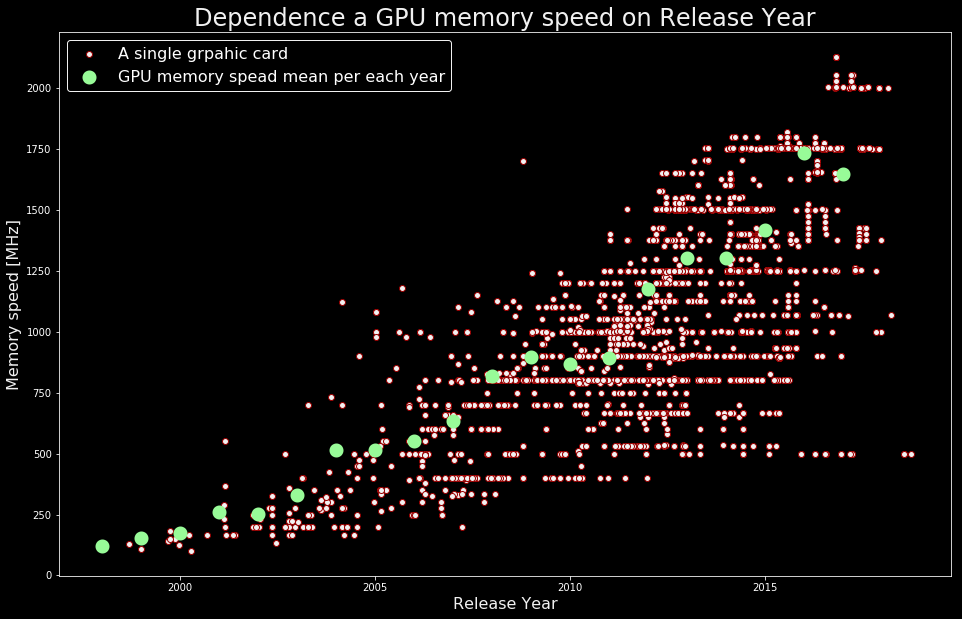

In [35]:
plt.figure(figsize=(16, 10))
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000", label = "A single grpahic card")
plt.scatter(x = X_discrete, y = Y_avg, c = "#98FB98", edgecolors = "#98FB98", linewidth = 8, label = "GPU memory spead mean per each year")
plt.legend()
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()

### 3.3 Creating a polynonomial regressor(model) to predict the growth of GPU memory speed


In [36]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_discrete)
poly_reg.fit(X_poly, Y_avg)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_avg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3.4 Visualisation of a model

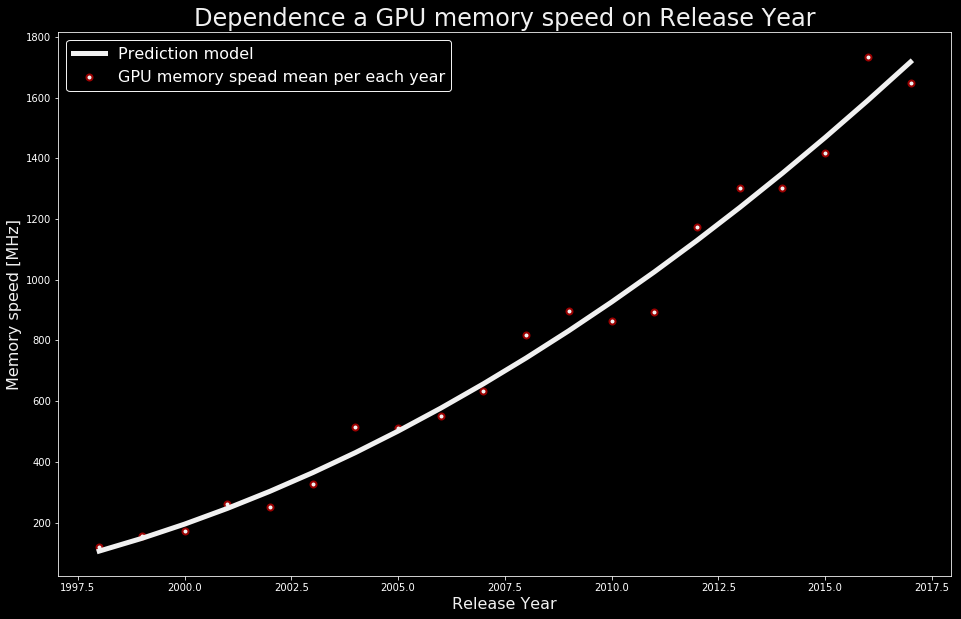

In [37]:
plt.figure(figsize=(16, 10))
plt.scatter(x = X_discrete, y = Y_avg, linewidth = 2, c = "#f1f1f1", edgecolors = "#990000", label = "GPU memory spead mean per each year")
plt.plot(X_discrete, lin_reg_2.predict(poly_reg.fit_transform(X_discrete)), color = '#f1f1f1', linewidth = 5, label = "Prediction model")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()

# 4. Memory vs Release Year Research

### 4.1 Preparing a helping column in calculation

In [41]:
df['Memory_Value'] = df['Memory'].str[0:-3].dropna(0).astype(int) #Cutting of the unit (MB and other white signs like space)
df.head(5)

,Best_Resolution,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Release_Price,Release_Date,Release_Year,Release,Memory_Speed_Value,Memory_Value
0,NaN,738 MHz,Nvidia,1024 MB,64GB/sec,256 Bit,1000 MHz,NaN,2009-03-01,2009,2009.282854,1000.0,1024.0
1,1366 x 768,\n-,AMD,512 MB,106GB/sec,512 Bit,828 MHz,NaN,2007-05-14,2007,2007.876626,828.0,512.0
2,1366 x 768,\n-,AMD,512 MB,51.2GB/sec,256 Bit,800 MHz,NaN,2007-12-07,2007,2008.229979,800.0,512.0
3,1024 x 768,\n-,AMD,256 MB,36.8GB/sec,128 Bit,1150 MHz,NaN,2007-07-01,2007,2007.616188,1150.0,256.0
4,1024 x 768,\n-,AMD,256 MB,22.4GB/sec,128 Bit,700 MHz,NaN,2007-06-28,2007,2008.419918,700.0,256.0


### 4.2 Preprocessing data & creating a np.array object

In [42]:
X = df['Release'].values #np array of years
Y = df['Memory_Value'].fillna(0).values # np array of MV
X = X.reshape(-1, 1)

### 4.3 Creating a regressor 

#### 4.3.1 Polynonomial regressors (4th degree)

In [43]:
X_discrete = df.iloc[:, [9]].values
X_discrete = np.unique(X_discrete)
X_discrete = X_discrete.reshape(-1, 1)

""" Counting the mean memory value per each integral year"""
Y_avg = [] # Here we store the vector of means
for year in X_discrete:
    mean = df[df['Release_Year'] == year[0]]['Memory_Value'].mean()
    Y_avg.append(mean)
Y_avg = np.array(Y_avg) 

In [44]:
degree_list = [4]
regressors_list = []
poly_reg_list = []
for degree in degree_list:
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, Y)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, Y)
    
    poly_reg_list.append(poly_reg)
    regressors_list.append(lin_reg)


### 4.3 Visualisation

#### 4.3.1 All GPU's on a plot, model & mean memory per each year

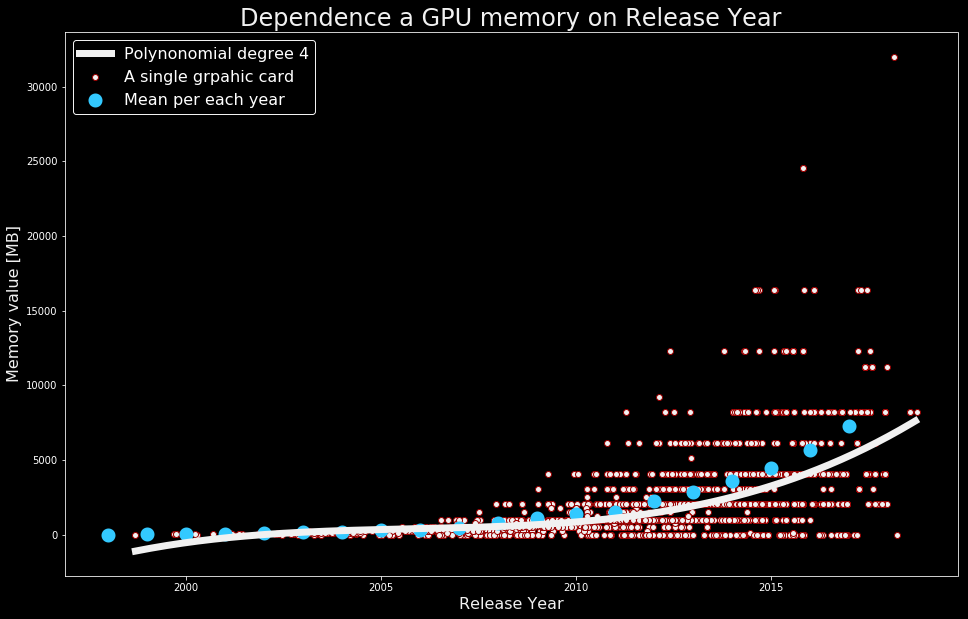

In [58]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) #Creating a X - grid, the range where to draw a plot

plt.figure(figsize=(16, 10))
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000", label = "A single grpahic card")
plt.scatter(x = X_discrete, y = Y_avg, edgecolors = color_palette_2[2], c= color_palette_2[2], linewidth = 8, label = "Mean per each year", )
for i in range(0, len(regressors_list)):
    plt.plot(X_grid, regressors_list[i].predict(poly_reg_list[i].fit_transform(X_grid)) , label = "Polynonomial degree {}".format(degree_list[i]), linewidth = 7, color = color_palette_1[i])
plt.title("Dependence a GPU memory on Release Year", fontsize = 24, color = "#f1f1f1")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory value [MB]", fontsize = 16, color = "#f1f1f1")
plt.show()

#### 4.3.2 Mean & median comparison

In [46]:
""" Counting the median of memory value per each integral year"""
Y_med = [] # Here we store the vector of means
for year in X_discrete:
    median = df[df['Release_Year'] == year[0]]['Memory_Value'].median()
    Y_med.append(median)
Y_med = np.array(Y_med) 


"""Counting the mode of memory value per each integral year """

Y_mod = [] # Here we store the vector of means
for year in X_discrete:
    mode = df[df['Release_Year'] == year[0]]['Memory_Value'].mode()
    Y_mod.append(mode)
Y_mod = np.array(Y_mod) 

Y_mod_2 = []
for i in range(0, len(Y_mod)):
    Y_mod_2.append(Y_mod[i][0])
    
Y_mod = np.array(Y_mod_2)

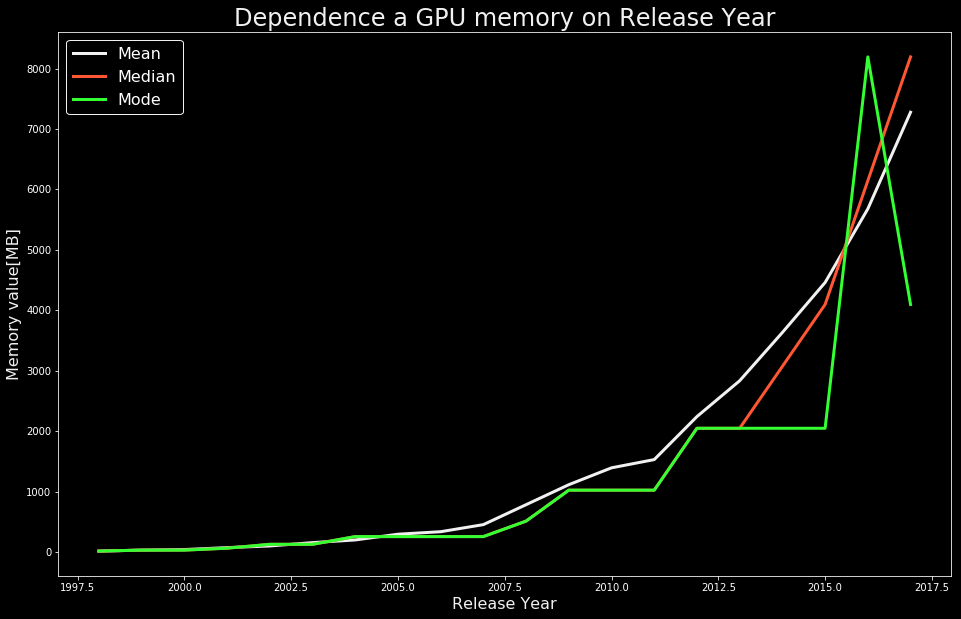

In [47]:
plt.figure(figsize=(16, 10))
plt.plot(X_discrete, Y_avg, linewidth = 3, color = color_palette_1[0], label = "Mean")
plt.plot(X_discrete, Y_med, linewidth = 3, color = color_palette_2[0], label = "Median")
plt.plot(X_discrete, Y_mod, linewidth = 3, color = color_palette_2[1], label = "Mode")
plt.title("Dependence a GPU memory on Release Year", fontsize = 24, color = "#f1f1f1")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory value[MB]", fontsize = 16, color = "#f1f1f1")
plt.show()

# 5. Checking out who is the leader on the market today and in past years

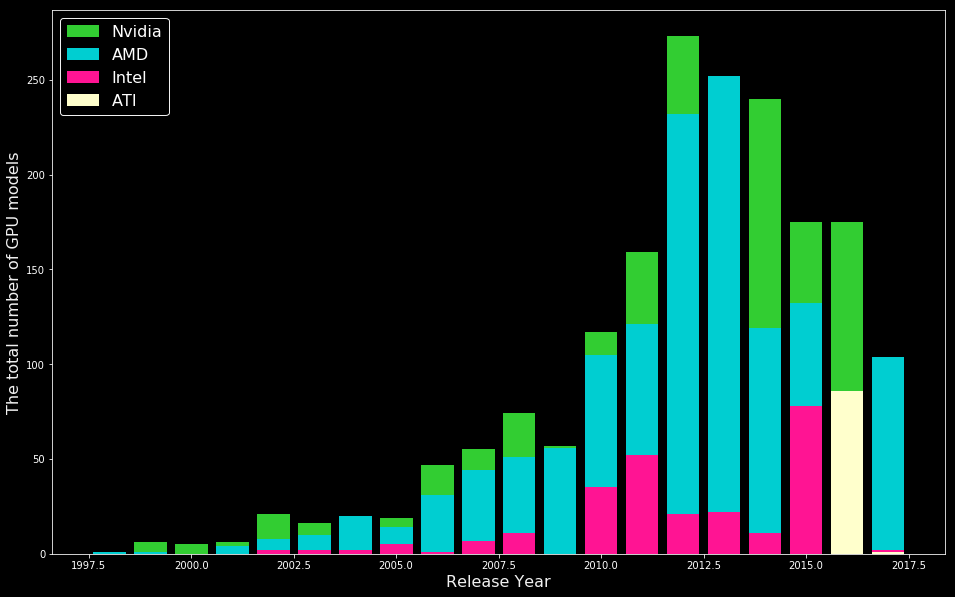

In [48]:
years_unique = df['Release_Year'].unique().tolist()
manufacturer_list = df['Manufacturer'].unique().tolist()
counter = 0
plt.figure(figsize=(16, 10))
for manufacturer in manufacturer_list:
    gpu_list = []
    for year in years_unique:
        Y_man = df['Manufacturer'][df['Manufacturer'] == manufacturer][df['Release_Year'] == year].tolist()
        Y_man_length = len(Y_man)
        gpu_list.append(Y_man_length)
    counter = counter + 1
    plt.bar(years_unique,  gpu_list, label = manufacturer, color = color_palette_1[counter])
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("The total number of GPU models", fontsize = 16, color = "#f1f1f1")
plt.show()

#### Note:
On the right side of the histogram we can see an anomaly. The total number of GPU models suddenly decreased in last years. It may have been caused by an incomplete dataset.


# 6. Trying to guess what an average GPU's parameters will look like in a random future year

### 6.1 Generating random years' list in a reasonable range

In [101]:
years_range = (2000, 2050)
years_number = 10
years = []
for i in range(0, years_number):
    year = random.randint(years_range[0], years_range[1])
    if year in years:
        years_number = years_number + 1
        continue
    years.append(year)
tmp_years = years    
years = np.array(years)
years = years.reshape(-1, 1)

In [102]:

memory_speed = lin_reg_2.predict(poly_reg.fit_transform(years))
memory = regressors_list[0].predict(poly_reg_list[0].fit_transform(years))
dataframe = pd.DataFrame({'Release Year': tmp_years,'Memory Speed [Hz]': memory_speed, "Memory[MB]": memory})
dataframe = dataframe.set_index("Release Year")
dataframe

,Memory Speed [Hz],Memory[MB]
Release Year,,
2048,7809.520336,233370.506611
2049,8072.619873,250309.475418
2030,3771.709536,44924.262634
2008,742.502598,558.688835
2010,926.704070,861.992908
2011,1025.811084,1118.674149
2029,3587.332096,39718.300758
2035,4757.860313,78032.471722
2038,5400.304467,104240.030575
